# Importing and Transforming Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from chord import Chord
pd.set_option('precision', 3)

In [2]:
! pwd

/Users/jenniferzhan/ao3-vizzes/ATLA


In [82]:
df_in = pd.read_csv('atla_fics_1205_full_mod.csv')

#dropping duplicate rows in case the the scraping was restarted at the wrong place
df_in = df_in.drop_duplicates()

df_in.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,body,all_kudos,all_bookmarks
0,27896395,Owner of My Heart (Little Pieces),['Neva_Borne'],General Audiences,F/M,Avatar: The Last Airbender,Katara/Zuko (Avatar),"Katara (Avatar), Zuko (Avatar)","fire lord, Fire Lady, ZK Drabble December 2020...",English,...,2020-12-05,415.0,1/1,3.0,32.0,5.0,189,NaN,"['lisannafirevixen', 'MiraculousMultifandom', ...","['lisannafirevixen', 'NickyADon', 'i_guess_the..."
1,27896272,What Started In Beautiful Rooms,['somefanficthoughts'],General Audiences,M/M,Avatar: The Last Airbender,Sokka/Zuko (Avatar),"Sokka (Avatar), Zuko (Avatar), Original Female...","Ambassador Sokka (Avatar), Aged-Up Character(s...",English,...,2020-12-05,878.0,1/?,NaN,35.0,1.0,177,NaN,"['Miss_Rust', 'MissWriter244', 'azura_mist', '...",['oz_s']
2,25574854,The Dragon of the South,['LazyDaydreamerX'],Teen And Up Audiences,Multi,Avatar: The Last Airbender,"Other Relationship Tags to Be Added, Sokka/Zuk...","Sokka (Avatar), Katara (Avatar), Aang (Avatar)...","AU, Firebender Sokka (Avatar), Smart Sokka (Av...",English,...,2020-12-05,66045.0,21/?,175.0,595.0,104.0,11210,NaN,"['hope_lumus', 'molymall', 'FireChildSlytherin...","['hazylavender', 'Mike_Wazowski_God', 'tblu', ..."
3,26838538,Conflagration,['Theodur'],Teen And Up Audiences,"F/M, F/F",Avatar: The Last Airbender,"Katara/Zuko (Avatar), Katara & Zuko (Avatar), ...","Katara (Avatar), Zuko (Avatar), Aang (Avatar),...","Romance, Slow Burn, Mild Smut, Zutara, Friends...",English,...,2020-12-05,54904.0,20/52,50.0,81.0,16.0,3050,NaN,"['JhoanaHere', 'missmango18', 'TheEmptySkies',...","['JhoanaHere', 'TheEmptySkies', 'July19', 'hon..."
4,27896089,Barely Disguised,['cassacain'],General Audiences,F/F,Avatar: The Last Airbender,Mai/Ty Lee (Avatar),"Mai (Avatar), Ty Lee (Avatar), Azula (Avatar),...","mailee, Friends to Lovers",English,...,2020-12-05,1648.0,1/1,2.0,7.0,NaN,59,NaN,"['alligator_writes', 'tarotapioca', 'drogodruo...",[]


In [83]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21711 entries, 0 to 21710
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_id          21711 non-null  int64  
 1   title            21711 non-null  object 
 2   author           21711 non-null  object 
 3   rating           21711 non-null  object 
 4   category         20365 non-null  object 
 5   fandom           21711 non-null  object 
 6   relationship     18160 non-null  object 
 7   character        21089 non-null  object 
 8   additional tags  20023 non-null  object 
 9   language         21711 non-null  object 
 10  published        21711 non-null  object 
 11  status           21711 non-null  object 
 12  status date      21711 non-null  object 
 13  words            21705 non-null  float64
 14  chapters         21711 non-null  object 
 15  comments         18474 non-null  float64
 16  kudos            21510 non-null  float64
 17  bookmarks   

In [89]:
#clean up and add new columns
df_edit = df_in.copy()

for col in ['character', 'relationship']:
    df_edit[col] = df_edit[col].str.replace('Toph Bei Fong','Toph Beifong')
    df_edit[col] = df_edit[col].str.replace('Original Female Character','OFC')
    df_edit[col] = df_edit[col].str.replace('Original Male Character','OMC')

df_edit['published'] = pd.to_datetime(df_edit['published'], format='%Y-%m-%d')
df_edit['published_year'] = pd.DatetimeIndex(df_edit['published']).year
df_edit['pub_date_yr_month'] = df_edit['published'].dt.strftime('%Y-%m')
df_edit['contains_rs_ship'] = np.where((df_edit['relationship'].str.contains('/')) & ~(df_edit['relationship'].isnull()), 1, 0)
df_edit['kudos'] = df_edit['kudos'].fillna(0)

In [92]:
df_edit.describe()

,work_id,words,comments,kudos,bookmarks,hits,body,published_year,contains_rs_ship
count,2.171e+04,2.170e+04,18474.000,21711.000,19297.000,21711.000,0.0,21711.000,21711.000
mean,1.834e+07,9.652e+03,38.447,270.276,44.013,3189.777,NaN,2017.962,0.702
std,9.774e+06,4.015e+04,148.654,709.742,169.189,9795.340,NaN,3.079,0.457
min,8.000e+00,0.000e+00,1.000,0.000,1.000,0.000,NaN,2005.000,0.000
25%,1.017e+07,1.061e+03,4.000,29.000,3.000,447.000,NaN,2017.000,0.000
50%,2.412e+07,2.397e+03,9.000,80.000,10.000,1099.000,NaN,2020.000,1.000
75%,2.606e+07,6.434e+03,25.000,222.000,29.000,2759.000,NaN,2020.000,1.000
max,2.792e+07,2.441e+06,7208.000,24584.000,8208.000,748332.000,NaN,2020.000,1.000


In [93]:
#Aggregate by month published to see fics published over time 
agg = {'work_id':'count', 'relationship':'count'}

df_date = (df_edit.groupby(['pub_date_yr_month'])['work_id','relationship'].agg(agg)
          ).rename(columns={'work_id':'total_works', 'relationship':'total_works_with_relationship'})

df_date['total_gen_fics'] = df_date['total_works'] - df_date['total_works_with_relationship']
df_date['pct_gen_fics'] = df_date['total_gen_fics'] / df_date['total_works']

/Users/jenniferzhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


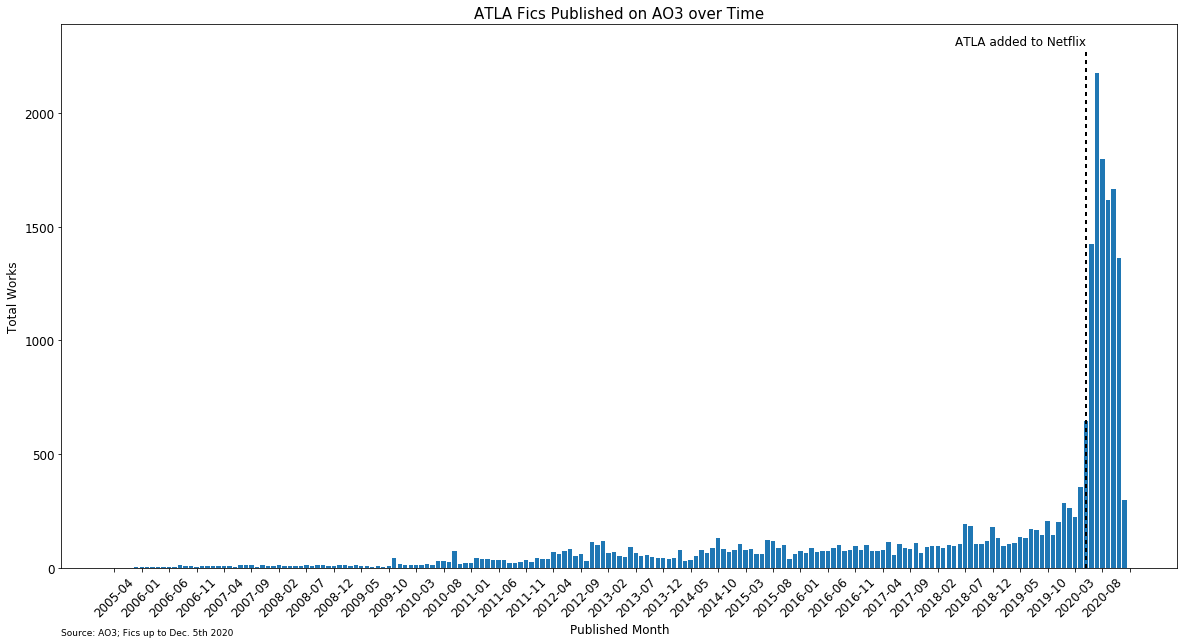

In [94]:
plt.figure(figsize=(20, 10))
x = df_date.index
y = df_date['total_works']
plt.bar(x, y)
plt.plot(['2020-05', '2020-05'], [0, y.max()+100], 'k-', lw=2,dashes=[2, 2])
plt.text('2020-05',2300,'ATLA added to Netflix', horizontalalignment='right', fontsize=12)
plt.xticks(np.arange(0, len(x)+1, 5), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Published Month', fontsize=12)
plt.ylabel('Total Works', fontsize=12)
plt.title('ATLA Fics Published on AO3 over Time', fontsize=15)
plt.annotate('Source: AO3; Fics up to Dec. 5th 2020', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=9)
plt.savefig('atla_fics_over_time.png')

plt.show()

/Users/jenniferzhan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jenniferzhan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jenniferzhan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


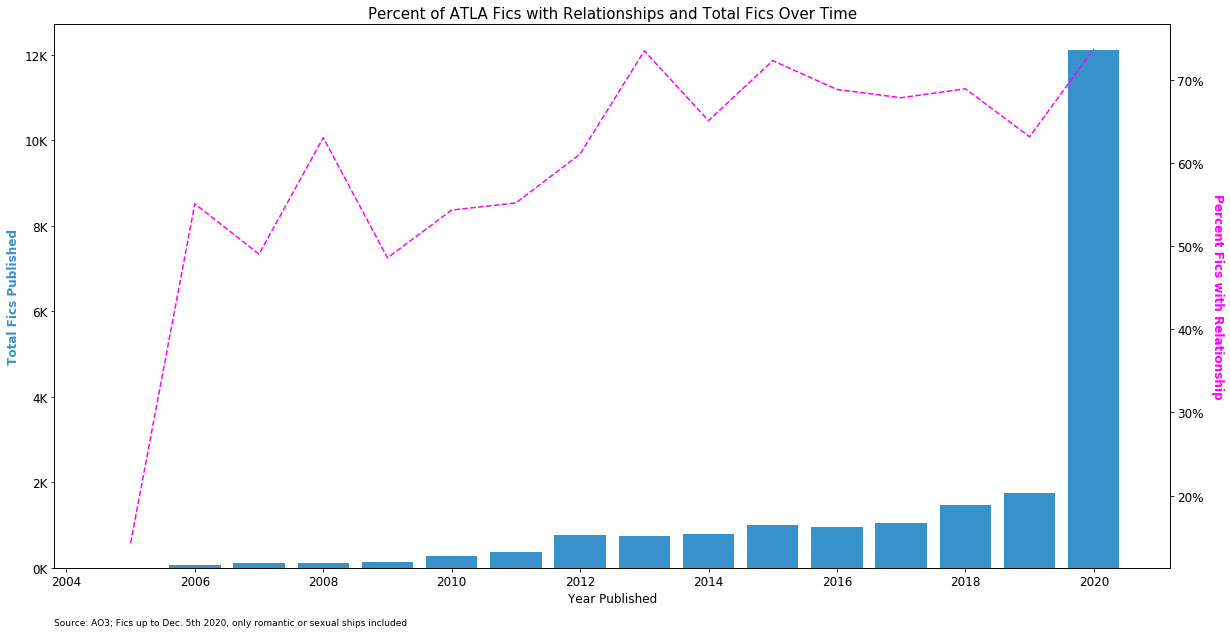

In [95]:
#Aggregate by year to see fics published and percent with relationship over time 
agg = {'work_id':'count', 'relationship':'count', 'words':'mean', 'contains_rs_ship':'sum'}
col_date = list(agg.keys())

df_date = (df_edit.groupby(['published_year'])[col_date].agg(agg)
          ).rename(columns={'work_id':'total_works'
                            , 'relationship':'total_works_with_any_relationship'
                            , 'contains_rs_ship':'total_works_with_romantic_or_sexual_relationship'
                            , 'words':'average_words'})

df_date['pct_any_relationship_fics'] = df_date['total_works_with_any_relationship'] / df_date['total_works']
df_date['pct_rs_relationship_fics'] = df_date['total_works_with_romantic_or_sexual_relationship'] / df_date['total_works']

x = df_date.index
y1 = df_date['pct_rs_relationship_fics']
y2 = df_date['total_works']

f, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Percent of ATLA Fics with Relationships and Total Fics Over Time', fontsize=15)
ax2 = ax1.twinx()
ax1.bar(x, y2, color='#3792cb', width=0.8)
ax2.plot(x, y1, '--', color='magenta')
ax1.set_xlabel('Year Published', fontsize=12)

ax1.set_ylabel('Total Fics Published', color='#3792cb', fontweight='bold', fontsize=12)
ax2.set_ylabel('Percent Fics with Relationship', color='magenta', fontweight='bold', rotation=270, labelpad=20, fontsize=12)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))  
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '{:,.0f}'.format(x/1000) + 'K'))
plt.xticks(fontsize=12)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
#ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}' + 'K'))

plt.annotate('Source: AO3; Fics up to Dec. 5th 2020, only romantic or sexual ships included', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=9)

plt.savefig('atla_pct_ship_over_time.png')
plt.show()

In [96]:
#Filtering only for fics that have at least one tagged relationship
df_with_r = df_edit.loc[~df_edit.relationship.isna()].copy()

In [97]:
df_with_r.count()

work_id              18160
title                18160
author               18160
rating               18160
category             17508
fandom               18160
relationship         18160
character            17772
additional tags      16989
language             18160
published            18160
status               18160
status date          18160
words                18154
chapters             18160
comments             15903
kudos                18160
bookmarks            16557
hits                 18160
body                     0
all_kudos            18160
all_bookmarks        18160
published_year       18160
pub_date_yr_month    18160
contains_rs_ship     18160
dtype: int64

In [99]:
df_with_r['Zuko/Sokka'] = np.where(df_with_r['relationship'].str.contains('Sokka/Zuko') 
                                   | df_with_r['relationship'].str.contains('Zuko/Sokka'), 1, 0)

df_with_r['Zuko/Katara'] = np.where(df_with_r['relationship'].str.contains('Katara/Zuko') 
                                   | df_with_r['relationship'].str.contains('Zuko/Katara'), 1, 0)

agg = {'Zuko/Sokka':'sum', 'Zuko/Katara':'sum', 'work_id':'nunique'}

df_fam = df_with_r.groupby(['published_year']).agg(agg).rename(columns={'work_id':'total_works'})
df_fam['Other_Works'] = df_fam['total_works'] - df_fam['Zuko/Sokka'] - df_fam['Zuko/Katara']

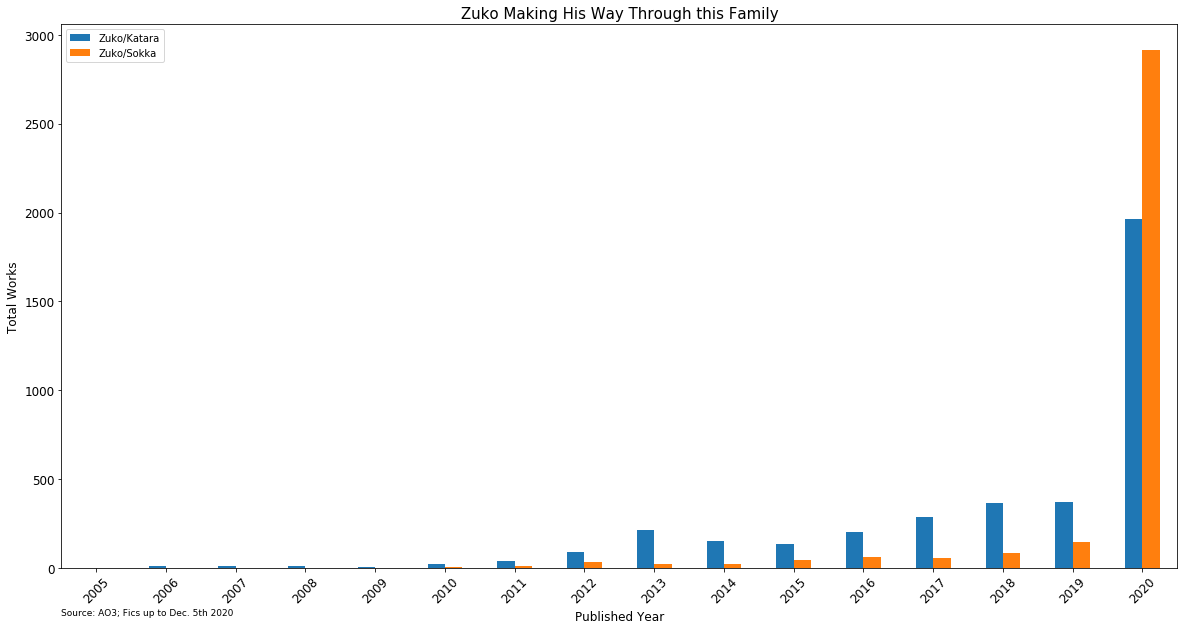

In [100]:
ax = df_fam[['Zuko/Katara', 'Zuko/Sokka']].plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(20,10)
plt.title('Zuko Making His Way Through this Family', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Published Year', fontsize=12)
plt.ylabel('Total Works', fontsize=12)
plt.annotate('Source: AO3; Fics up to Dec. 5th 2020', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=9)
plt.savefig('Zuko_Fam.png')

plt.show()

In [101]:
#split out multiple ships in one fic
df_r = df_with_r.relationship.str.split(',', expand=True)

#joins back to original df
df_r2 = pd.concat([df_with_r[['work_id', 'published_year', 'kudos']], df_r], axis = 1)
df_r2.head()

,work_id,published_year,kudos,0,1,2,3,4,5,6,...,71,72,73,74,75,76,77,78,79,80
0,27896395,2020,32.0,Katara/Zuko (Avatar),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,27896272,2020,35.0,Sokka/Zuko (Avatar),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,25574854,2020,595.0,Other Relationship Tags to Be Added,Sokka/Zuko (Avatar),Minor or Background Relationship(s),None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,26838538,2020,81.0,Katara/Zuko (Avatar),Katara & Zuko (Avatar),Suki/Ty Lee (Avatar),Aang/Katara (Avatar) temporarily,Mai & Zuko (Avatar) temporarily,None,None,...,None,None,None,None,None,None,None,None,None,None
4,27896089,2020,7.0,Mai/Ty Lee (Avatar),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [132]:
#unpivot by relationship for easy data cleaning 
df_long = pd.melt(df_r2, id_vars = ['work_id', 'published_year', 'kudos'], var_name = 'relationship_number', value_name = 'ship')
df_long.head()

,work_id,published_year,kudos,relationship_number,ship
0,27896395,2020,32.0,0,Katara/Zuko (Avatar)
1,27896272,2020,35.0,0,Sokka/Zuko (Avatar)
2,25574854,2020,595.0,0,Other Relationship Tags to Be Added
3,26838538,2020,81.0,0,Katara/Zuko (Avatar)
4,27896089,2020,7.0,0,Mai/Ty Lee (Avatar)


In [133]:
#drop rows where ship is null (since unpivot creates a row for rel_2, rel_40 even if fic only has one ship)
df_long = df_long.dropna(subset = ['ship']).copy()
df_long['relationship_number'] =  df_long['relationship_number'] + 1 
df_long.head()

,work_id,published_year,kudos,relationship_number,ship
0,27896395,2020,32.0,1,Katara/Zuko (Avatar)
1,27896272,2020,35.0,1,Sokka/Zuko (Avatar)
2,25574854,2020,595.0,1,Other Relationship Tags to Be Added
3,26838538,2020,81.0,1,Katara/Zuko (Avatar)
4,27896089,2020,7.0,1,Mai/Ty Lee (Avatar)


In [160]:
ct_rel_num = df_long.groupby('work_id')['relationship_number'].max().to_frame().reset_index()

pct_rel_num = ct_rel_num.groupby('relationship_number')['work_id'].nunique().to_frame().rename(columns={'work_id':'total_works'})
pct_rel_num['pct_total_fics'] = pct_rel_num['total_works'] / pct_rel_num['total_works'].sum().round(3)
pct_rel_num['cum_sum_pct'] = pct_rel_num['pct_total_fics'].cumsum()

pct_rel_num.head(11)

,total_works,pct_total_fics,cum_sum_pct
relationship_number,,,
1,9284,0.528,0.528
2,3378,0.192,0.721
3,1804,0.103,0.823
4,1180,0.067,0.890
5,639,0.036,0.927
6,414,0.024,0.950
7,243,0.014,0.964
8,163,0.009,0.973
9,124,0.007,0.980


In [134]:
#split out ship into the characters
#note that I am only looking at romantic ships right now--platonic denoted by & will be discarded
df_char = df_long.ship.str.split('/', expand=True)
df_char = df_char.add_prefix('char_')

#joins back to original df
df_long_2 = pd.concat([df_long, df_char], axis = 1)
df_long_2.head()

,work_id,published_year,kudos,relationship_number,ship,char_0,char_1,char_2,char_3,char_4,char_5,char_6,char_7
0,27896395,2020,32.0,1,Katara/Zuko (Avatar),Katara,Zuko (Avatar),None,None,None,None,None,None
1,27896272,2020,35.0,1,Sokka/Zuko (Avatar),Sokka,Zuko (Avatar),None,None,None,None,None,None
2,25574854,2020,595.0,1,Other Relationship Tags to Be Added,Other Relationship Tags to Be Added,None,None,None,None,None,None,None
3,26838538,2020,81.0,1,Katara/Zuko (Avatar),Katara,Zuko (Avatar),None,None,None,None,None,None
4,27896089,2020,7.0,1,Mai/Ty Lee (Avatar),Mai,Ty Lee (Avatar),None,None,None,None,None,None


In [135]:
#Removing extra spaces and the name of the media at the end of the character
#(e.g., ' Sokka (Avatar)' becomes 'Sokka')
for col in [col for col in df_long_2.columns if col.startswith('char')]:
    df_long_2[col] = df_long_2[col].str.strip()
    df_long_2[col] = df_long_2[col].str.replace(' \(.+\)', '')
    
df_long_2.head()

,work_id,published_year,kudos,relationship_number,ship,char_0,char_1,char_2,char_3,char_4,char_5,char_6,char_7
0,27896395,2020,32.0,1,Katara/Zuko (Avatar),Katara,Zuko,None,None,None,None,None,None
1,27896272,2020,35.0,1,Sokka/Zuko (Avatar),Sokka,Zuko,None,None,None,None,None,None
2,25574854,2020,595.0,1,Other Relationship Tags to Be Added,Other Relationship Tags to Be Added,None,None,None,None,None,None,None
3,26838538,2020,81.0,1,Katara/Zuko (Avatar),Katara,Zuko,None,None,None,None,None,None
4,27896089,2020,7.0,1,Mai/Ty Lee (Avatar),Mai,Ty Lee,None,None,None,None,None,None


In [136]:
#Removing the rows without a second character (either gen ship or poorly tagged rs ship)
df_long_2 = df_long_2.dropna(subset=['char_1']).reset_index().drop(columns='index')
df_long_2.head()

,work_id,published_year,kudos,relationship_number,ship,char_0,char_1,char_2,char_3,char_4,char_5,char_6,char_7
0,27896395,2020,32.0,1,Katara/Zuko (Avatar),Katara,Zuko,None,None,None,None,None,None
1,27896272,2020,35.0,1,Sokka/Zuko (Avatar),Sokka,Zuko,None,None,None,None,None,None
2,26838538,2020,81.0,1,Katara/Zuko (Avatar),Katara,Zuko,None,None,None,None,None,None
3,27896089,2020,7.0,1,Mai/Ty Lee (Avatar),Mai,Ty Lee,None,None,None,None,None,None
4,27857221,2020,0.0,1,Nara Shikadai /Yue,Nara Shikadai,Yue,None,None,None,None,None,None


In [137]:
df_copy = df_long_2.copy()
df_copy.loc[~df_copy['char_3'].isna()].head()

,work_id,published_year,kudos,relationship_number,ship,char_0,char_1,char_2,char_3,char_4,char_5,char_6,char_7
3993,24165247,2020,41.0,1,Azula/Korra/Ty Lee/Asami Sato,Azula,Korra,Ty Lee,Asami Sato,None,None,None,None
4077,24701011,2020,174.0,1,Suki/Sokka/Zuko/Mai/Ty Lee,Suki,Sokka,Zuko,Mai,Ty Lee,None,None,None
6566,8202484,2016,185.0,1,Uzumaki Naruto/Azula Uzumaki Naruto/Mai Uzumak...,Uzumaki Naruto,Azula Uzumaki Naruto,Mai Uzumaki Naruto,Ty Lee Uzumaki Naruto,June,None,None,None
7401,2201790,2014,53.0,1,Aang/Katara/Mai/Zuko (Avatar),Aang,Katara,Mai,Zuko,None,None,None,None
8195,388054,2012,38.0,1,Water/Earth/Fire/Air,Water,Earth,Fire,Air,None,None,None,None


In [138]:
char_col = [col for col in df_copy.columns if ('char' in col)]
#Remove the last item on the list because we don't need to loop through it 
char_col.pop()
other_col = [col for col in df_copy.columns if not('char' in col)]

In [139]:
#Loop through the pairings with more than two characters and create new rows for each two-person combo 

long_df_list = []
#long_df = df = pd.DataFrame(columns=[other_col + ['char_a', 'level_6', 'char_b']])
finished_col = []
for col in char_col:
    df_final_copy1 = (df_copy.drop(columns=finished_col)
                      .set_index(other_col + [col])
                      .stack().to_frame().reset_index()
                      .rename(columns={col:'char_a', 0:'char_b'})
                     )
    finished_col.append(col)
    long_df_list.append(df_final_copy1)
df_final = pd.concat(long_df_list)

In [140]:
df_final.loc[df_final['work_id'] == 24701011]

,work_id,published_year,kudos,relationship_number,ship,char_a,level_6,char_b
4142,24701011,2020,174.0,1,Suki/Sokka/Zuko/Mai/Ty Lee,Suki,char_1,Sokka
4143,24701011,2020,174.0,1,Suki/Sokka/Zuko/Mai/Ty Lee,Suki,char_2,Zuko
4144,24701011,2020,174.0,1,Suki/Sokka/Zuko/Mai/Ty Lee,Suki,char_3,Mai
4145,24701011,2020,174.0,1,Suki/Sokka/Zuko/Mai/Ty Lee,Suki,char_4,Ty Lee
15901,24701011,2020,174.0,2,Sokka/Suki (Avatar),Sokka,char_1,Suki
20068,24701011,2020,174.0,3,Sokka/Zuko (Avatar),Sokka,char_1,Zuko
22465,24701011,2020,174.0,4,Mai/Zuko (Avatar),Mai,char_1,Zuko
23894,24701011,2020,174.0,5,Mai/Ty Lee (Avatar),Mai,char_1,Ty Lee
24690,24701011,2020,174.0,6,Suki/Ty Lee (Avatar),Suki,char_1,Ty Lee
25225,24701011,2020,174.0,7,Sokka/Suki/Zuko (Avatar),Sokka,char_1,Suki


In [156]:
#For transforming the data into the input for the chord chart 
def create_matrix(data_input
                  , max_rel_num = 1
                  , max_pub_year = df_final['published_year'].max()
                  , min_pub_year = df_final['published_year'].min()
                  , min_num_kudos = 0
                  , min_num_fics = 10 
                  ):    

    #filter the dataframe based on relationship number, published period, and min kudos
    df_final_1 = data_input.loc[(data_input['relationship_number'] <= max_rel_num) 
                              & (data_input['published_year'] >= min_pub_year)
                              & (data_input['published_year'] <= max_pub_year)
                              & (data_input['kudos'] >= min_num_kudos)
                             ].copy()
    
    total_num_fics = df_final_1['work_id'].nunique()
    
    #Getting combinations of Char 0 and Char 1
    cooccurrence = pd.crosstab(index=[df_final_1['char_a']], columns=[df_final_1['char_b']])
    #Getting total list of unique characters
    chars = np.unique(df_final_1[['char_a', 'char_b']].values)
    #Reindexing so both rows and columns contain all characters
    cooccurrence = cooccurrence.reindex(index=chars, columns=chars)
    #Making it symmetrical 
    cooccurrence = cooccurrence.add(cooccurrence.T, fill_value=0)
    #Replacing NAs with 0s 
    cooccurrence = cooccurrence.fillna(0)
    
    #Check the accuracy of the matrix 
    check_1a = len(df_final_1.loc[((df_final_1['char_a'] == 'Zuko')& (df_final_1['char_b'] == 'Katara'))
               |((df_final_1['char_a'] == 'Katara')& (df_final_1['char_b'] == 'Zuko'))])
    check_1b = cooccurrence.Zuko['Katara']
    check_1c = cooccurrence.Katara['Zuko']

    if check_1a == check_1b == check_1c:
        print(f'The matrix is correct.\n')
    else: 
        print(f'Something went wrong with the matrix.\n')
    
    max_fics = cooccurrence.max().max()
    print(f'The most popular pairing has {max_fics} fics.\n')
    
    #For filtering for ships that have at least N fics
    cooccur_f = cooccurrence.copy()

    #Set pairings with fewer than N fics to zero
    cooccur_f[cooccur_f <= min_num_fics] = 0
    #Then filter out rows and columns that sum to zero (i.e., character does not pair with any other more than 5 times)
    cooccur_f = cooccur_f.loc[(cooccur_f.sum(axis=1) != 0), (cooccur_f.sum(axis=0) != 0)]
    
    #Set what matrix we want to try 
    matrix = cooccur_f

    #Get list of characters for chord labels
    names = list(matrix.columns)
    values = matrix.values.tolist()
    num_char = len(names)
    print(f'This chart encompasses {total_num_fics} fics published on AO3 between {min_pub_year} and {max_pub_year}, with at least {min_num_fics} occurrences and {min_num_kudos} kudos.') 
    print(f'Only the top {max_rel_num} tagged ships per fic are included. There are {num_char} characters in this chart.\n')

    chart = Chord(values, names
                  , margin = 40
                  , width = 600
                  , colors="d3.schemeSet3"
                  , opacity=0.8
                  , font_size="10px"
                  , font_size_large="15px"
                  , padding=0.03
                 )
    
    chart.show()
    return names, values, chart

In [157]:
names_2020, values_2020, chart_2020 = create_matrix(df_final, 
                              max_rel_num = 2,
                              min_num_fics = 50, 
                              max_pub_year = 2020)

The matrix is correct.

The most popular pairing has 3770.0 fics.

This chart encompasses 14375 fics published on AO3 between 2005 and 2020, with at least 50 occurrences and 0 kudos.
Only the top 2 tagged ships per fic are included. There are 24 characters in this chart.



In [159]:
chart_2020.to_html('atla_2020.html')